# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/SMAI/rollnumber_A2/rollnumber_A2_Q3
%ls .

/content/drive/MyDrive/SMAI/rollnumber_A2/rollnumber_A2_Q3
ATnT/  Q3.ipynb


#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [ ]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)

(360, 112, 92) (360,)


array([[59, 60, 59, ..., 65, 65, 64],
       [58, 60, 61, ..., 63, 61, 60],
       [59, 57, 61, ..., 58, 65, 60],
       ...,
       [52, 55, 53, ..., 57, 60, 61],
       [55, 57, 54, ..., 54, 60, 54],
       [52, 56, 49, ..., 55, 53, 56]], dtype=uint8)
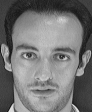

In [ ]:
trainFaces[0]

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [ ]:
def principalComponentAnalysis(X, numComponents):
    """
    Implement pca in the following function by taking the following arguements:
    1. X(images array)
    2. number of components
    The function must return the eigen vectors (principal components) also termed "Eigen faces"
    """

    # your code here
    n = X.shape[0]
    currX= X.reshape(n, -1)
    mean = np.mean(currX, axis=0)
    currX = currX - mean
    cov_matrix = np.cov(currX, rowvar=False)
    eval, evec = np.linalg.eigh(cov_matrix) # e vals and e vectors
    idx = np.argsort(eval)[::-1]
    evectors = evec[:, idx]
    evectors = evectors[:, :numComponents]

    return evectors, mean

In [ ]:
# plot the eigen faces
%matplotlib inline

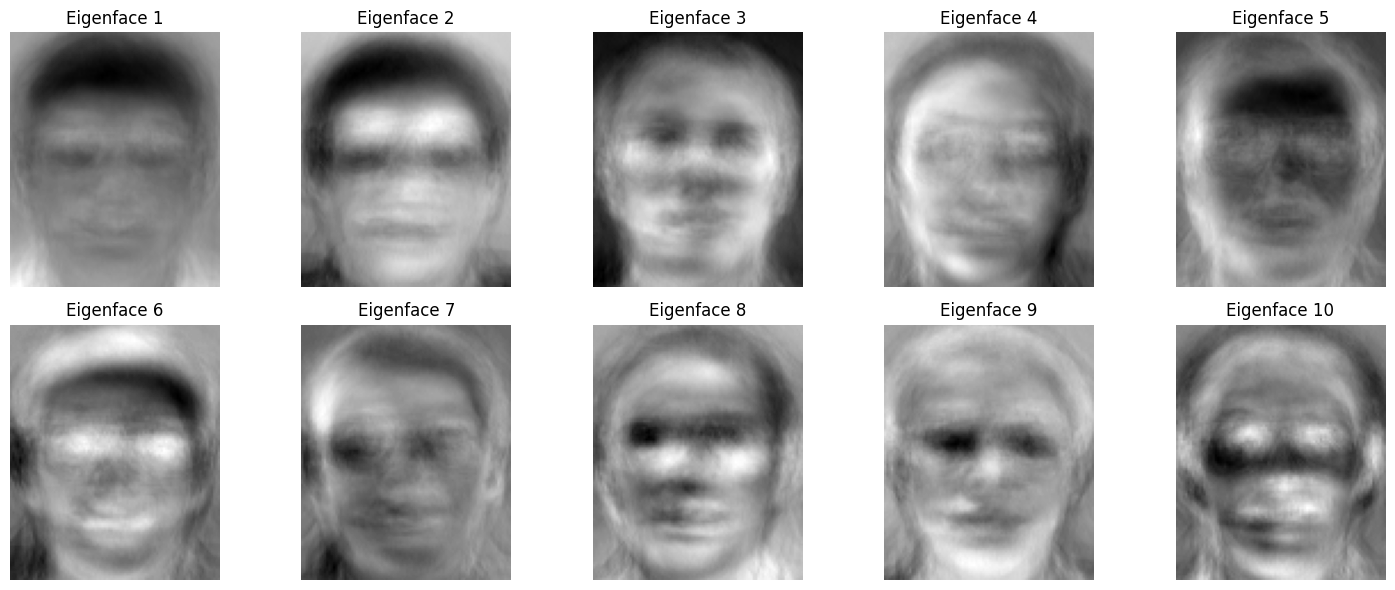

In [ ]:
eigen_faces, means = principalComponentAnalysis(trainFaces, 10)

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigen_faces[:, i].reshape((112, 92)), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [ ]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """

    # your code here
    # Now each face in the training set (minus the mean), (centeredFace) can be represented as a linear combination of these eigen vectors
    # These weights can be represnted by the dot product of the eigen vector and the cenered face

    flattened_test_face = np.ravel(testFace)
    centered_test_face = flattened_test_face - meanFace
    weights = np.dot(centered_test_face, eigenFaces)
    reconstructed_face = meanFace + np.dot(weights, eigenFaces.T) # add back the mean feature
    return reconstructed_face.reshape(testFace.shape) # reshape it to original

In [ ]:
# plot recontructions here
%matplotlib inline

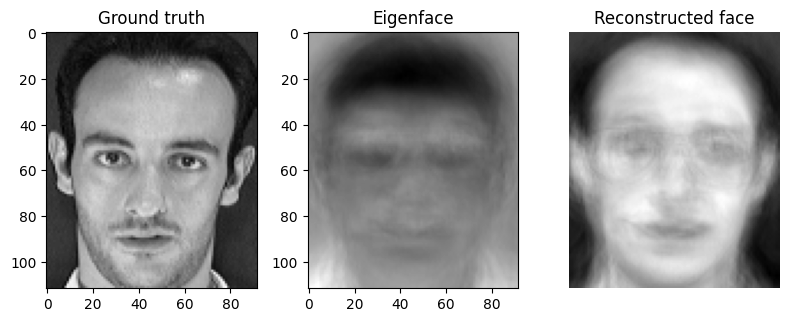

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(trainFaces[0], cmap='gray')
plt.title('Ground truth')
plt.subplot(1, 3, 2)
plt.imshow(eigen_faces[:, 0].reshape((112, 92)), cmap='gray')
plt.title(f'Eigenface')
plt.subplot(1, 3, 3)
plt.imshow(imageReconstruction(testFaces[0], eigen_faces, means), cmap='gray')
plt.title('Reconstructed face')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

In [ ]:
%matplotlib inline

def displayNfactors():

    # your code here
    faces = []
    n_comps = [5, 50, 100]
    for i in range(len(n_comps)):
      e_faces, e_means = principalComponentAnalysis(trainFaces, n_comps[i])
      face = imageReconstruction(trainFaces[0], e_faces, e_means)
      faces.append(face)

    return faces

faces = displayNfactors()

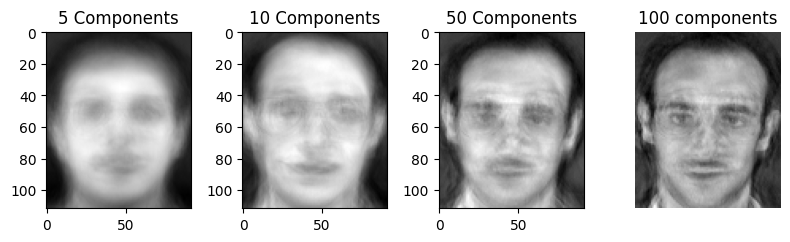

In [ ]:
%matplotlib inline
plt.figure(figsize=(8, 4))
plt.subplot(1, 4, 1)
plt.imshow(faces[0], cmap='gray')
plt.title('5 Components')
plt.subplot(1, 4, 2)
plt.imshow(imageReconstruction(testFaces[0], eigen_faces, means), cmap='gray')
plt.title('10 Components')

plt.subplot(1, 4, 3)
plt.imshow(faces[1], cmap='gray')
plt.title(f'50 Components')
plt.subplot(1, 4, 4)
plt.imshow(faces[2], cmap='gray')
plt.title('100 components')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
def classifyImage(test_image, eigen_faces, mean_face, X_train, y_train):
    """
    Arguments:
    1. test_image: Test image to be classified
    2. eigen_faces: Eigenvectors computed from the training set
    3. mean_face: Mean eigenface computed from the training set
    4. X_train: Training set images
    5. y_train: Labels corresponding to the training set images

    Returns:
    1. Best reconstructed image
    2. Error value
    3. Predicted class
    Classify a test image based on the nearest neighbor in the training set after reconstruction.
    """
    min_error = float('inf')
    predicted_label = None
    best_reconstructed_image = None
    n = len(eigen_faces)
    for num_components in range(n):
        curr_reconstruction = imageReconstruction(test_image, eigen_faces[:, :num_components], means)
        mse = np.mean((test_image - curr_reconstruction) ** 2)

        if mse < min_error or best_reconstructed_image is None:
            min_error = mse
            min_distance = float('inf')
            # print(min_error)

            for i in range(len(X_train)):
              distance = np.linalg.norm(curr_reconstruction - X_train[i])
              if distance < min_distance:
                  min_distance = distance
                  predicted_label = y_train[i]


            best_reconstructed_image = curr_reconstruction

    return best_reconstructed_image, min_error, predicted_label


Iterate through all the images in the test data and test the accuracy by taking different number of components

In [ ]:
reconstructed_image, error, predicted_class = classifyImage(testFaces[0], eigen_faces, means, testFaces, testLabels)
error, predicted_class
# for numComponents in components:
#     # your code here

(743.36538597897, 16)

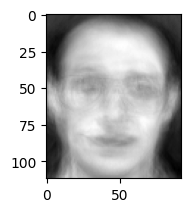

In [ ]:
%matplotlib inline
plt.figure(figsize=(8, 4))
plt.subplot(1, 4, 1)
plt.imshow(reconstructed_image, cmap='gray')

In [ ]:
components = [3,5,10,20,30,40,50]
mse = []
classes  = []
for component in components:
  curr_efaces, curr_means = principalComponentAnalysis(trainFaces, component)
  err = 0
  for i in range(len(testFaces)):
    test_image = testFaces[i]
    reconstructed_image, error, predicted_class = classifyImage(test_image, curr_efaces, curr_means, testFaces, testLabels)
    err += error
    classes.append([reconstructed_image, error, predicted_class])
  mse.append(err/len(testFaces))


20


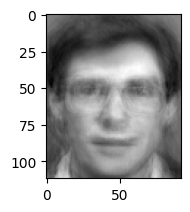

In [ ]:
sample = classes[-1]
%matplotlib inline
plt.figure(figsize=(8, 4))
plt.subplot(1, 4, 1)
plt.imshow(sample[0], cmap='gray')
print(sample[-1])

Plot Number of eigenvectors vs Mean Square Error

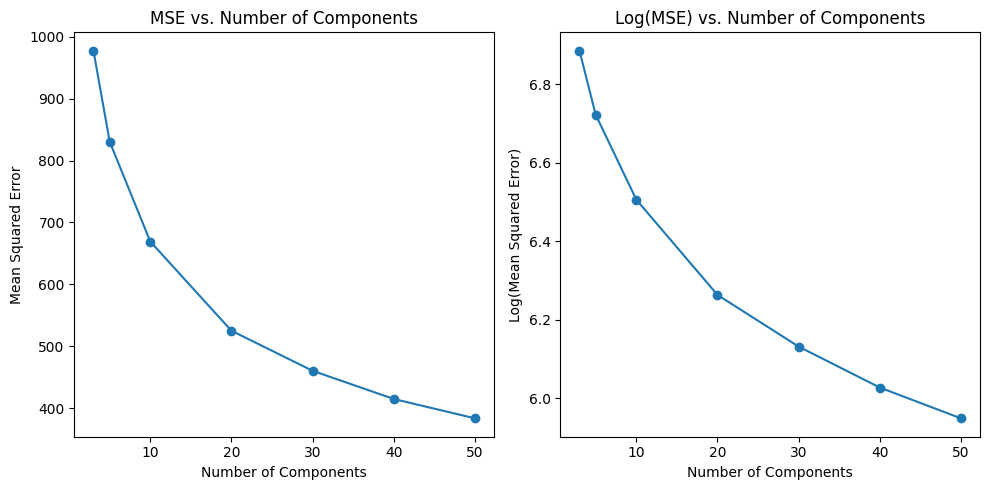

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(components, mse, marker='o')
plt.title('MSE vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(components, np.log(mse), marker='o')
plt.title('Log(MSE) vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Log(Mean Squared Error)')

plt.tight_layout()
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

In [ ]:
# your code here
# done above